In [21]:
import numpy as np
import graphviz
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score # will be used to separate training and test

# Classifiers introduction - Exercise text

In the following program we introduce the basic steps of classification of a dataset in a matrix

Importing the packages for this exercise.

Define the matrix containing the data (one example per row) and the vector containing the corresponding target value.

In [22]:
# simple initial dataset
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data.

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf.

In [24]:
print(clf.predict([[0, 1, 1]]))  # note: [0 1 1] not yet in the matrix

[0]


In [25]:
# note: both example are in the matrix
print(clf.predict([[1, 0, 1], [0, 0, 1]]))
# Here, the output is [1 0], which is a vector of label.
# Each label is the prediction of he given classes

[1 0]


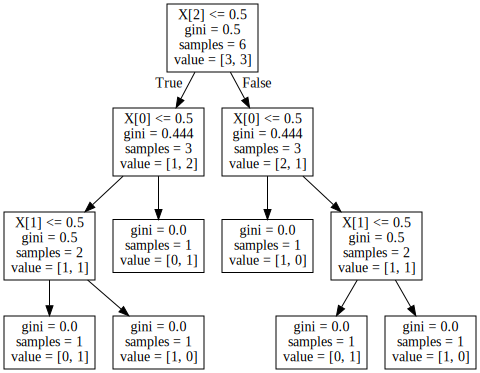

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In the following cells, we start using the Iris dataset (from UCI Machine Learning repository)

In [27]:
iris = load_iris()

## Type of prediction model and the working criteria

Declare the type of prediction model and the working criteria for the model induction algorithm

**Note**: from now on, we will use **two important parameters**:

1. ```min_sample_spit```: used to control **overfitting** in **internal nodes**, 
2. ```min_sample_leaf```: used to control **overfitting** in **leaves**.


In [28]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=300,
                                  min_samples_leaf=5,
                                  class_weight={0: 1, 1: 1, 2: 1})

## Split the dataset in training and test set

In [29]:
# Generate a random permutation of the indices of examples that will be later
# used for the training and the test set
np.random.seed(0)

# randomly choose the indices of some entries to put in the training set.
# we use the randomly generated indices for training later.
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining
# for the training set
indices_training = indices[:-10]
indices_test = indices[-10:]

# keep for training all the matrix elements with the exception of the last 10
iris_X_train = iris.data[indices_training]
iris_y_train = iris.target[indices_training]

# keep the last 10 elements for test set
iris_X_test = iris.data[indices_test]
iris_y_test = iris.target[indices_test]

## Fit the learning model on training set

In [30]:
# Fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

## Obtain predictions

In [31]:
# Apply fitted model "clf" to the test set
predicted_y_test = clf.predict(iris_X_test)

# Print the predictions (class numbers associated to classes names
# in target names)
print("Predictions: \t{0}".format(predicted_y_test))
print("True classes:\t{0}".format(iris_y_test))
print("Iris target names: {0}".format({k: v for k, v in enumerate(iris.target_names,
                                                                  start=0)}))

Predictions: 	[1 2 1 0 0 0 2 1 2 0]
True classes:	[1 1 1 0 0 0 2 1 2 0]
Iris target names: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


Print the index of the test instances and the corresponding predictions

In [32]:
# Print the corresponding instances indexes and class names
for i in range(len(iris_y_test)):
    print("Instance # {0}:".format(indices_test[i]))
    print("Predicted: {0}\t True: {1}\n".format(iris.target_names[predicted_y_test[i]],
                                                iris.target_names[iris_y_test[i]]))

Instance # 88:
Predicted: versicolor	 True: versicolor

Instance # 70:
Predicted: virginica	 True: versicolor

Instance # 87:
Predicted: versicolor	 True: versicolor

Instance # 36:
Predicted: setosa	 True: setosa

Instance # 21:
Predicted: setosa	 True: setosa

Instance # 9:
Predicted: setosa	 True: setosa

Instance # 103:
Predicted: virginica	 True: virginica

Instance # 67:
Predicted: versicolor	 True: versicolor

Instance # 117:
Predicted: virginica	 True: virginica

Instance # 47:
Predicted: setosa	 True: setosa



## Look at the specific examples

In [33]:
for i in range(len(iris_y_test)): 
    print("Instance # {0} {1}:".format(i, indices_test))
    s = ""
    for j in range(len(iris.feature_names)):
        s = s + iris.feature_names[j] + "=" + str(iris_X_test[i][j])
        if j<len(iris.feature_names)-1: s = s + ", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 0 [ 88  70  87  36  21   9 103  67 117  47]:
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 1 [ 88  70  87  36  21   9 103  67 117  47]:
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 2 [ 88  70  87  36  21   9 103  67 117  47]:
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 3 [ 88  70  87  36  21   9 103  67 117  47]:
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 4 [ 88  70  87  36  21   9 103  67 117  47]:
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 5 [ 88  70  87  36  21   9 103  67 117  47]:
sepal length (cm)=4.9, sepal wi

## Obtain model performance results

In [34]:
# Print some metrics results
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: {0} = {0:.0%}".format(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: {0}".format(f1))

Accuracy score: 0.9 = 90%
F1 score: 0.8857142857142858


## Cross Validation and comparison with F1 Score

In [35]:
# Cross_val_score will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)

scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy. cv=5 -> 5 folds
print("Cross-validation scores:\t{0}".format(scores))

# Computes F1-score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print("F1 scores:\t\t\t{0}".format(f1_scores))

Cross-validation scores:	[0.96666667 1.         0.86666667 0.86666667 1.        ]
F1 scores:			[0.96658312 1.         0.86111111 0.86666667 1.        ]


## Show the resulting tree 

### Print the picture in a PDF file

In [36]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("./figures/my_iris_predictions")

'./figures\\my_iris_predictions.pdf'

### Generate a picture here

In [37]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


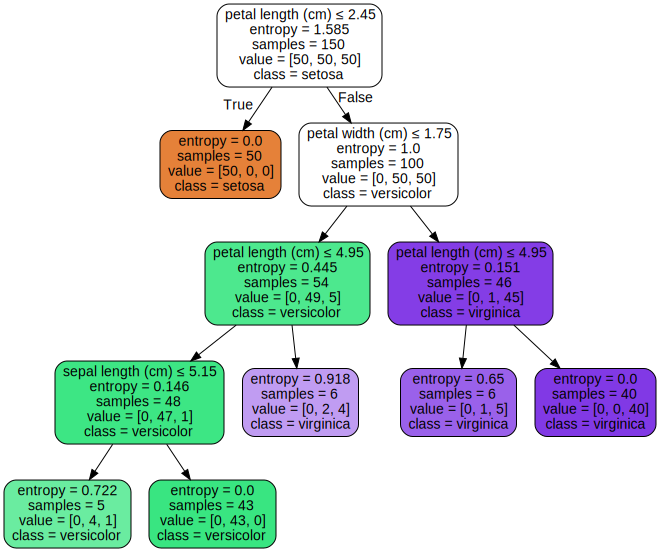

In [38]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.
2. modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice versa) and learn the tree in these conditions. You should obtain similar results as for step 
3. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc. Use misclassification error.
4. build the confusion matrix of the created tree models on the test set and show them. 
5. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class. (1-vs-rest model)

for the last point, 2 possibility: 

1. implement yourself the function which you need
2. or go in sklearn is there is thew empirical probability. Decision tree can be sed to compute classification probability of the class. In this case the teacher may ask you to explain which function you have used. (clf.predict_proba - Probability prediction foreach classifier)

In [39]:
#help(tree._tree.Tree) # Help of sklearn.tree